<a href="https://colab.research.google.com/github/Ddasunsandeepa/DeepLearning-with-Tensorflow/blob/main/02.Tensorflow_with_Classification/Classification_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
!pip install opendatasets

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import opendatasets as od
import pandas as pd


In [55]:
od.download("https://www.kaggle.com/datasets/saranpannasuriyaporn/male-female-height-and-weight")

Skipping, found downloaded files in "./male-female-height-and-weight" (use force=True to force download)


In [56]:
df = pd.read_csv('male-female-height-and-weight/Test set.csv')

In [57]:
df

,Height,Weight,Sex
0,146.323241,59.861065,Female
1,175.695412,77.863687,Male
2,183.216164,72.131992,Male
3,184.245269,77.546000,Male
4,132.302261,55.188496,Female
...,...,...,...
200,155.090314,77.248911,Female
201,149.175907,93.231692,Male
202,168.030874,63.640623,Female
203,172.608090,55.189983,Male


In [58]:
df.loc[df['Sex']=='Male' , 'Sex'] = 1
df.loc[df['Sex']=='Female' , 'Sex'] = 0

In [59]:
df.head()

,Height,Weight,Sex
0,146.323241,59.861065,0
1,175.695412,77.863687,1
2,183.216164,72.131992,1
3,184.245269,77.546000,1
4,132.302261,55.188496,0


In [60]:
y = df['Sex']
x = df[['Height', 'Weight']]

In [61]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X = pd.DataFrame(x_scaled, columns=['Height', 'Weight'])

In [62]:
x.head()

,Height,Weight
0,146.323241,59.861065
1,175.695412,77.863687
2,183.216164,72.131992
3,184.245269,77.546000
4,132.302261,55.188496


In [63]:
y.head()

,Sex
0,0
1,1
2,1
3,1
4,0


In [64]:
y = y.astype('int')
y.head()

,Sex
0,0
1,1
2,1
3,1
4,0


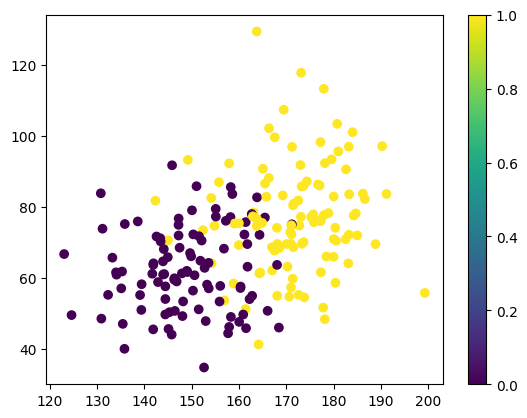

In [65]:
plt.scatter(x[ 'Height'], x['Weight'], c=y)
plt.colorbar()
plt.show()

In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [67]:
x_train.shape , x_test.shape

((164, 2), (41, 2))

In [68]:
import tensorflow as tf


In [69]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64 , activation="relu" , input_shape=(2,)),
    tf.keras.layers.Dense(26 , activation="relu"),
    tf.keras.layers.Dense(16 , activation="relu"),
    tf.keras.layers.Dense(2, activation="softmax")
])

model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.005),
    metrics = ['accuracy']
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [70]:
history = model.fit(x_train, y_train, epochs = 20)

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5008 - loss: 4.3086
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5366 - loss: 1.7603 
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5157 - loss: 2.3346 
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5755 - loss: 2.0139 
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5170 - loss: 1.3653 
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5543 - loss: 0.8672 
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4626 - loss: 0.7075 
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5429 - loss: 0.6783 
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5504 - loss: 0.6794 
Epoch 10/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5598 - loss: 0.6747 
Epoch 11/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5557 - loss: 0.6678 
Epoch 12/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5279 - loss: 0.6954 


In [71]:
x_train.info()




<class 'pandas.core.frame.DataFrame'>
Index: 164 entries, 66 to 102
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  164 non-null    float64
 1   Weight  164 non-null    float64
dtypes: float64(2)
memory usage: 3.8 KB


In [72]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 164 entries, 66 to 102
Series name: Sex
Non-Null Count  Dtype
--------------  -----
164 non-null    int64
dtypes: int64(1)
memory usage: 2.6 KB


In [73]:
x_train.dtypes

,0
Height,float64
Weight,float64


In [74]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 26)             │         1,690 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │           432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,046 (27.53 KB)

 Trainable params: 2,348 (9.17 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,698 (18.36 KB)

In [75]:
model.evaluate(x_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5348 - loss: 0.7898 


[0.7927182912826538, 0.5365853905677795]

In [76]:
pred = model.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


In [77]:
pred[:5]

array([[0.6550165 , 0.34498346],
       [0.7957459 , 0.20425403],
       [0.7310141 , 0.26898593],
       [0.8219661 , 0.1780339 ],
       [0.5386127 , 0.46138722]], dtype=float32)

In [78]:
tf.squeeze(pred)

<tf.Tensor: shape=(41, 2), dtype=float32, numpy=
array([[0.6550165 , 0.34498346],
       [0.7957459 , 0.20425403],
       [0.7310141 , 0.26898593],
       [0.8219661 , 0.1780339 ],
       [0.5386127 , 0.46138722],
       [0.75938976, 0.24061021],
       [0.73375094, 0.26624897],
       [0.7515012 , 0.2484987 ],
       [0.7604879 , 0.23951204],
       [0.6932396 , 0.3067604 ],
       [0.79753345, 0.2024665 ],
       [0.7395386 , 0.26046133],
       [0.779231  , 0.22076902],
       [0.73515034, 0.26484963],
       [0.6303382 , 0.36966172],
       [0.59902996, 0.40097   ],
       [0.63288295, 0.367117  ],
       [0.8133663 , 0.1866337 ],
       [0.5695235 , 0.4304765 ],
       [0.7178994 , 0.28210065],
       [0.63744533, 0.36255476],
       [0.7432135 , 0.25678656],
       [0.67900187, 0.32099813],
       [0.5010172 , 0.49898267],
       [0.7595216 , 0.24047844],
       [0.7582707 , 0.24172929],
       [0.76098365, 0.23901638],
       [0.7941444 , 0.20585553],
       [0.6834149 , 0.31658

In [79]:
y_test[:5]

,Sex
15,0
9,1
100,1
132,0
68,1


In [88]:
y_pred = np.argmax(pred , axis=1)
pre = tf.keras.metrics.Precision()
pre.update_state(y_test , y_pred)
pre.result()

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [89]:
y_pred = np.argmax(pred , axis=1)
re = tf.keras.metrics.Recall()
re.update_state(y_test , y_pred)
re.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.05000000074505806>

In [82]:
import numpy as np

y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob >= 0.5).astype(int)
y_pred[:5]


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0]])

In [83]:
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob,axis=1)
y_pred[:5]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


array([0, 0, 0, 0, 0])

In [84]:
history.history

{'accuracy': [0.4878048896789551,
  0.5365853905677795,
  0.5121951103210449,
  0.5792682766914368,
  0.5182926654815674,
  0.5304877758026123,
  0.49390244483947754,
  0.5304877758026123,
  0.5609756112098694,
  0.5243902206420898,
  0.5548780560493469,
  0.5365853905677795,
  0.5182926654815674,
  0.542682945728302,
  0.5853658318519592,
  0.5304877758026123,
  0.5243902206420898,
  0.5304877758026123,
  0.5304877758026123,
  0.5487805008888245],
 'loss': [3.6473801136016846,
  1.9253838062286377,
  2.1933772563934326,
  1.8035062551498413,
  1.2456297874450684,
  0.8081842064857483,
  0.6902657747268677,
  0.6768513321876526,
  0.6730090379714966,
  0.6893339157104492,
  0.6686307787895203,
  0.6942631602287292,
  0.7129218578338623,
  0.6965371370315552,
  0.6735432147979736,
  0.6710188984870911,
  0.6941137313842773,
  0.6710060238838196,
  0.7346169948577881,
  0.8191770315170288]}

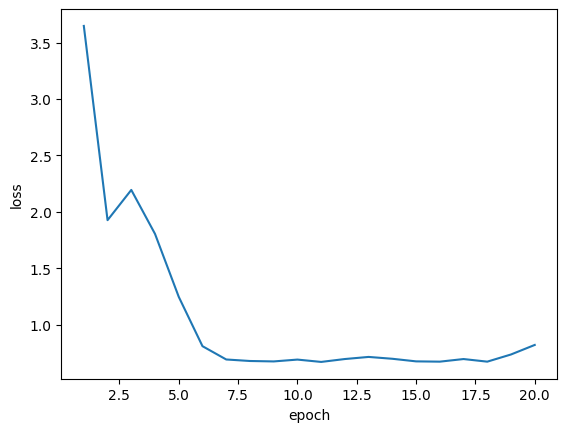

In [85]:
x_range = range(1, 20+1)
loss = history.history['loss']
plt.plot(x_range, loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [86]:
for layer in model.layers:
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]
    print(f"\nWeights:\n {weights} \nBiases:\n {biases}")


Weights:
 [[ 0.21780606  0.16043855 -0.22649792  0.15846528 -0.282143   -0.146643
  -0.12380165 -0.06526563  0.02754059  0.01700216 -0.2670294  -0.27341646
  -0.10856353 -0.0265762  -0.26086167  0.00295773 -0.27120462  0.13998857
  -0.28369248 -0.13472469 -0.21684577 -0.25192976 -0.14954454 -0.09482262
   0.11249812  0.19176243  0.08583528 -0.01871514  0.229259    0.09913643
   0.05487875  0.05693294 -0.08446313  0.16068791 -0.12369919  0.22166334
   0.05314571 -0.276274    0.28074577 -0.05925811  0.2537586  -0.18331245
   0.24236365 -0.08371344 -0.2898084   0.19102885 -0.07284458  0.21959071
  -0.26905918  0.09935617 -0.28720683  0.1356618  -0.01888391 -0.27293426
  -0.23164788  0.22089532  0.17310856 -0.05878721 -0.2337381  -0.25645477
   0.01785944  0.03354311  0.16045214  0.23703693]
 [-0.1646663   0.02447913  0.26370847  0.10847881 -0.30035707  0.2049762
   0.1899691   0.13617426  0.10392844  0.13486522 -0.11428264 -0.23766875
  -0.08585283  0.19049267 -0.15843913 -0.20681366 -0.

<Axes: >

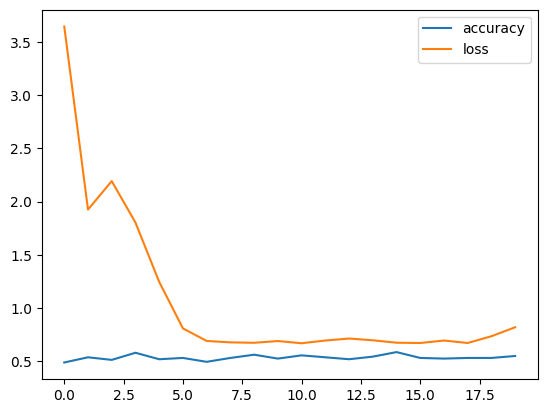

In [87]:
pd.DataFrame(history.history).plot()